**IMDB example

In [38]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [4]:
train_data[0]
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data]) # for giving max index 1000 tk bcoz we using top 10,000 words

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])  
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**Listing 3.2 Encoding the integer sequences into a binary matrix

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  #
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.    # set all i to 1s
    return results
x_train = vectorize_sequences(train_data)  #vectorizing training and test data
x_test = vectorize_sequences(test_data)

In [12]:
 x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])


9999

In [7]:
# to encode the data in tensors form
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
#You should also vectorize your labels, which is straightforward:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
#Now the data is ready to be fed into a neural network.

In [9]:
#definig model
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
#compling the mode or defining the loss function and optimizer
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
#setting a validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
# train your model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 48s 3ms/sample - loss: 0.5140 - acc: 0.7791 - val_loss: 0.3983 - val_acc: 0.8540
Epoch 2/20
15000/15000 [==============================] - 8s 561us/sample - loss: 0.3054 - acc: 0.9049 - val_loss: 0.3046 - val_acc: 0.8851
Epoch 3/20
15000/15000 [==============================] - 7s 478us/sample - loss: 0.2248 - acc: 0.9237 - val_loss: 0.2796 - val_acc: 0.8909
Epoch 4/20
15000/15000 [==============================] - 6s 379us/sample - loss: 0.1783 - acc: 0.9407 - val_loss: 0.2780 - val_acc: 0.8892
Epoch 5/20
15000/15000 [==============================] - 5s 341us/sample - loss: 0.1423 - acc: 0.9545 - val_loss: 0.2946 - val_acc: 0.8845
Epoch 6/20
15000/15000 [==============================] - 5s 345us/sample - loss: 0.1205 - acc: 0.9617 - val_loss: 0.2934 - val_acc: 0.8854
Epoch 7/20
15000/15000 [==============================] - 5s 348us/sample - loss: 0.1002 - acc: 0.9701 - val_lo

In [14]:
# dictionary tells u on which history of things which are monittered during training
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

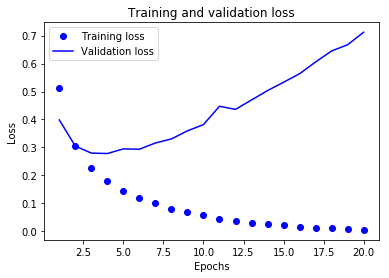

In [17]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
#Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.4371 - acc: 0.8225
Epoch 2/4
25000/25000 [==============================] - 11s 439us/sample - loss: 0.2544 - acc: 0.9123
Epoch 3/4
25000/25000 [==============================] - 6s 240us/sample - loss: 0.1989 - acc: 0.9295
Epoch 4/4
25000/25000 [==============================] - 110s 4ms/sample - loss: 0.2924 - acc: 0.8846


In [27]:
#Using a trained network to generate predictions on new data
model.predict(x_test)

array([[0.22160801],
       [0.9999435 ],
       [0.8410514 ],
       ...,
       [0.17300546],
       [0.08101219],
       [0.6885994 ]], dtype=float32)

# further experiment on IDMB example

In [28]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))  # using three hidden layers
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 94s 4ms/sample - loss: 0.1279 - acc: 0.8215
Epoch 2/4
25000/25000 [==============================] - 6s 238us/sample - loss: 0.0645 - acc: 0.9151
Epoch 3/4
25000/25000 [==============================] - 6s 223us/sample - loss: 0.0532 - acc: 0.9307
Epoch 4/4
25000/25000 [==============================] - 48s 2ms/sample - loss: 0.0964 - acc: 0.8750


# Classifying newswires:
a multiclass classification example

In [29]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [30]:
 train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [31]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [32]:
train_labels[10]

3

In [33]:
#Preparing the data
#Encoding the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [34]:
# One-hot encoding is a widely used format for categorical data, also called categorical encoding.
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [40]:
#model defination
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [41]:
#compliling the model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [42]:
#validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [44]:
#training the model
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 280us/sample - loss: 0.2110 - acc: 0.9499 - val_loss: 0.8896 - val_acc: 0.8240
Epoch 2/20
7982/7982 [==============================] - 2s 275us/sample - loss: 0.1815 - acc: 0.9530 - val_loss: 0.9223 - val_acc: 0.8190
Epoch 3/20
7982/7982 [==============================] - 2s 269us/sample - loss: 0.1629 - acc: 0.9550 - val_loss: 0.9414 - val_acc: 0.8140
Epoch 4/20
7982/7982 [==============================] - 2s 269us/sample - loss: 0.1490 - acc: 0.9551 - val_loss: 0.9747 - val_acc: 0.8120
Epoch 5/20
7982/7982 [==============================] - 2s 267us/sample - loss: 0.1422 - acc: 0.9539 - val_loss: 0.9824 - val_acc: 0.8120
Epoch 6/20
7982/7982 [==============================] - 2s 282us/sample - loss: 0.1324 - acc: 0.9549 - val_loss: 1.0388 - val_acc: 0.8060
Epoch 7/20
7982/7982 [==============================] - 2s 291us/sample - loss: 0.1251 - acc: 0.9560 - val_loss: 1.0908 - va

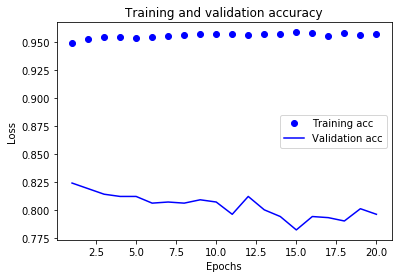

In [45]:
#plotting
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# further exeriment on NEWS REuters

**Experiment 1 using 64 se 4 layers or phr 46 ka output

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 455us/sample - loss: 2.9354 - acc: 0.2879 - val_loss: 2.2059 - val_acc: 0.5850
Epoch 2/20
7982/7982 [==============================] - 3s 363us/sample - loss: 1.7556 - acc: 0.6198 - val_loss: 1.6437 - val_acc: 0.6240
Epoch 3/20
7982/7982 [==============================] - 3s 369us/sample - loss: 1.3917 - acc: 0.6709 - val_loss: 1.5055 - val_acc: 0.6490
Epoch 4/20
7982/7982 [==============================] - 3s 366us/sample - loss: 1.2117 - acc: 0.7040 - val_loss: 1.4416 - val_acc: 0.6550
Epoch 5/20
7982/7982 [==============================] - 3s 365us/sample - loss: 1.0804 - acc: 0.7186 - val_loss: 1.3746 - val_acc: 0.6700
Epoch 6/20
7982/7982 [==============================] - 3s 384us/sample - loss: 0.9756 - acc: 0.7403 - val_loss: 1.3641 - val_acc: 0.6840
Epoch 7/20
7982/7982 [==============================] - 3s 382us/sample - loss: 0.8870 - acc: 0.7565 - val_loss: 1.3324 - va

In [47]:
#Experiment two using 32units layers pehly 64 thi
# and usnig only ione layer pehly 2 thi
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 477us/sample - loss: 1.8842 - acc: 0.6461 - val_loss: 1.2427 - val_acc: 0.7400
Epoch 2/20
7982/7982 [==============================] - 3s 361us/sample - loss: 0.9562 - acc: 0.8038 - val_loss: 0.9839 - val_acc: 0.7980
Epoch 3/20
7982/7982 [==============================] - 3s 369us/sample - loss: 0.6507 - acc: 0.8693 - val_loss: 0.8682 - val_acc: 0.8230
Epoch 4/20
7982/7982 [==============================] - 3s 374us/sample - loss: 0.4636 - acc: 0.9057 - val_loss: 0.8212 - val_acc: 0.8200
Epoch 5/20
7982/7982 [==============================] - 3s 391us/sample - loss: 0.3453 - acc: 0.9265 - val_loss: 0.8110 - val_acc: 0.8240
Epoch 6/20
7982/7982 [==============================] - 3s 399us/sample - loss: 0.2672 - acc: 0.9397 - val_loss: 0.8090 - val_acc: 0.8370
Epoch 7/20
7982/7982 [==============================] - 3s 436us/sample - loss: 0.2197 - acc: 0.9459 - val_loss: 0.8448 - va

# 3.6 Predicting house prices: a regression example

In [1]:
#Listing 3.24 Loading the Boston housing dataset
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [3]:
print(train_data.shape)
print(test_data.shape)
train_targets

(404, 13)
(102, 13)


array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [6]:
#Preparing the data
# Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


In [8]:
#Model definition
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [9]:
# K-fold validation bcoz of less training data
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [11]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [13]:
print(all_scores)
np.mean(all_scores)

[2.514567, 2.2873652, 2.3907766, 2.953773, 2.4822114]


2.5257387

In [19]:
#Saving the validation logs at each fold
num_epochs = 10
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [20]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


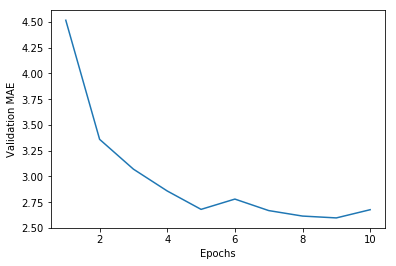

In [22]:
 #Plotting validation scores
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [23]:
#Training the final model
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/sample - loss: 19.1689 - mean_absolute_error: 2.6713


In [24]:
test_mae_score

2.671294